# **Predictive Analytics: Supplement Demand Forcasting**


# **0. Domain Proyek**

Saat ini industri kesehatan menjadi bagian penting dalam kehidupan masyarakat modern, terutama pasca pandemi COVID-19. Hal ini menunjukkan adanya peningkatan kesadaran masyarakat terhadap kesehatan dan mendorong permintaan produk-produk kesehatan seperti vitamin, mineral dan herbal. Namun, di tengah pertumbuhan ini, perusahan di industri kesehatan mengalami tantangan besar dalam memprediksi kebutuhan produk-produk tersebut secara akurat. Pola ini dapat dipengaruhi oleh beberapa faktor seperti harga, diskon, platform penjualan dan lokasi geografis.

Masalah yang timbul adalah terjadinya overstock (stok berlebihan) dan stockout(kehabisan stock) yang menyebabkan kerugian finansial bagi perusahaan karena kesalahan dalam prediksi permintaan pasar. Menurut penelitian oleh Carbonneau et al. (2008) dalam European Journal of Operational Research, kesalahan prediksi permintaan dapat menyebabkan biaya tambahan sebesar 20-30% dari total biaya logistik, terutama untuk produk musiman atau berbasis kesehatan. Oleh karena itu, untuk meminimalisir kerugian finansial dari kesalahan prediksi, perlu diselesaikan dengan membangun model machine learning. Model yang dibangun model prediksi berbasis data historis agar lebih efektif dan efisien.


**Referensi:**
- Carbonneau, R., Laframboise, K., & Vahidov, R. (2008). Application of machine learning techniques for supply chain demand forecasting. European Journal of Operational Research, 184(3), 1140–1154. https://doi.org/10.1016/j.ejor.2006.12.004

# **1. Business Understanding**

## **1.1 Problem Statements**

Berdasarkan kondisi yang telah diuraikan sebelumnya, perusahaan akan mengembangkan sebuah sistem prediksi penjualan produk suplemen kesehatan untuk menjawab permasalahan berikut:

- Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap jumlah penjualan produk suplemen kesehatan (units sold)?

- Berapa jumlah produk suplemen yang akan terjual pada bulan tertentu dengan karakteristik atau fitur tertentu seperti harga, diskon, lokasi, dan platform penjualan?

## **1.2 Goals**

Untuk menjawab pertanyaan tersebut, Anda akan membuat predictive modelling dengan tujuan atau goals sebagai berikut:

- Mengetahui fitur-fitur yang paling berkorelasi dan berpengaruh terhadap volume penjualan produk (units sold).

- Membangun model machine learning yang dapat memprediksi jumlah unit produk yang akan terjual secara akurat berdasarkan data historis dan fitur yang tersedia.

## **1.3 Solution Statements**

Untuk mencapai tujuan tersebut, beberapa solusi yang akan dilakukan:

- Membangun model dengan algortima XGBoost yang akan dievaluasi dengan metrik RMSE dan MAPE.

- Melakukan hyperparameter tuning untuk menemukan model terbaik sebagai solusi.

# **2. Data Understanding**

## **2.1 Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## **2.2 Dataset Preview**

- **Tentang Dataset**:
  Dataset ini memuat data penjualan mingguan dari berbagai suplemen kesehatan mulai dari Januari 2020 hingga April 2025. Dataset ini memuat produk dalam kategori seperti Protein, Vitamin, Omega dan Asam Amino serta lainnya yang dijual pada beberapa platform e-commerce seperti Amazon, Walmart dan iHerb. Dataset ini juga melihat penjualan di 3 negara yakni USA, UK dan Canada.  

- **Key Feature**:

| **Nama Kolom**     | **Deskripsi**                                                                 |
|--------------------|--------------------------------------------------------------------------------|
| `Date`             | Tanggal penjualan mingguan (setiap hari Senin) dari Januari 2020 – April 2025. |
| `Product Name`     | Nama produk suplemen yang dijual (contoh: Whey Protein, Vitamin C, dll).       |
| `Category`         | Kategori produk suplemen (contoh: Protein, Vitamin, Omega, dll).               |
| `Units Sold`       | Jumlah unit produk yang terjual pada minggu tersebut.                          |
| `Price`            | Harga jual produk per unit.                                                    |
| `Revenue`          | Total pendapatan yang dihasilkan (Units Sold × Price).                         |
| `Discount`         | Diskon yang diberikan (dalam persentase dari harga asli).                      |
| `Units Returned`   | Jumlah unit yang dikembalikan pada minggu tersebut.                            |
| `Location`         | Lokasi penjualan (USA, UK, atau Canada).                                       |
| `Platform`         | Platform e-commerce tempat penjualan berlangsung (Amazon, Walmart, iHerb).     |


- **Sumber Dataset**:  
   Sumber dataset yang digunakan adalah **Supplement Sales Data** dari repositori Kaggle dengan link berikut https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data

## **2.3 Load Dataset**

In [ ]:
!curl -L -o /content/supplement-sales-data.zip\
  https://www.kaggle.com/api/v1/datasets/download/zahidmughal2343/supplement-sales-data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 66800  100 66800    0     0  79098      0 --:--:-- --:--:-- --:--:--     0


In [ ]:
!unzip /content/supplement-sales-data.zip -d /content/

Archive:  /content/supplement-sales-data.zip
  inflating: /content/Supplement_Sales_Weekly_Expanded.csv  


In [ ]:
dataset = pd.read_csv('/content/Supplement_Sales_Weekly_Expanded.csv')
dataset.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [ ]:
dataset = dataset.sort_values('Date')

In [ ]:
dataset.shape

(4384, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 376.8+ KB


**Insight**:
- Pada dataset yang digunakan terdiri dari 10 fitur dengan 4384 baris data.
- Pada dataset ini juga memuat fitur dengan dengan tipe data numerik dan kategorik.
- Salah satu fitur yakni Date bertipe data object yang perlu diubah menjadi datetime.

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

## **2.4 Check Missing Value**

In [ ]:
dataset.isna().any()

,0
Date,False
Product Name,False
Category,False
Units Sold,False
Price,False
Revenue,False
Discount,False
Units Returned,False
Location,False
Platform,False


**Insight**:
- Pada dataset tidak ditemukan missing value ditandai dengan hasil keluaran boolean False di setiap fiturnya.

## **2.5 Check Duplicated Data**

In [ ]:
dataset.duplicated().sum()

np.int64(0)

**Insight**:
- Pada dataset tidak ditemukan data yang duplikat.

## **2.6 Check Unique Value**

In [ ]:
def unique_categorical(dataset, column_name):
    try:
        print(f"Number of unique {column_name}: {dataset[column_name].nunique()}")
        print(f"Unique {column_name}:")
        for value in dataset[column_name].unique():
            print(f"- {value}")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the dataset.")

In [ ]:
unique_categorical(dataset, 'Product Name')

Number of unique Product Name: 16
Unique Product Name:
- Whey Protein
- Electrolyte Powder
- Iron Supplement
- Green Tea Extract
- Biotin
- Ashwagandha
- Magnesium
- Collagen Peptides
- Melatonin
- Creatine
- BCAA
- Pre-Workout
- Multivitamin
- Fish Oil
- Vitamin C
- Zinc


In [ ]:
unique_categorical(dataset, 'Category')

Number of unique Category: 10
Unique Category:
- Protein
- Hydration
- Mineral
- Fat Burner
- Vitamin
- Herbal
- Sleep Aid
- Performance
- Amino Acid
- Omega


In [ ]:
unique_categorical(dataset, 'Location')

Number of unique Location: 3
Unique Location:
- Canada
- USA
- UK


In [ ]:
unique_categorical(dataset, 'Platform')

Number of unique Platform: 3
Unique Platform:
- Walmart
- Amazon
- iHerb


**Insight**:
- Pada kolom Produk Name tedapat 16 nilai unik yang mewakili dari 16 produk yang terdapat pada dataset.
- Dari 16 produk tersebut, termasuk pada 10 kategori produk.
- Dimana untuk platform yang digunakan yakni Walmart, Amazon dan iHerb yang berlokasi di 3 negara yakni Canada, UK dan USA.

## **2.7 Exploratory Data Analysis (EDA)**

### **2.7.1 Descriptive Statistics**

In [ ]:
dataset.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479


**Insight**:
- Dari statistik deskriptif yang ditampilkan, secara umum nilai pada Units Sold terdistribusi cukup normal.
- Berbeda pada Price dan Discount yang nilainya distribusi merata.
- Untuk Revenue dan Units Returned memiliki distribusi yang mengarah ke right-skew namun tidak ekstrim.

### **2.7.2 Univariat Analysis**

In [ ]:
dataset_num = dataset.select_dtypes(include=['number'])
dataset_num.head()

,Units Sold,Price,Revenue,Discount,Units Returned
0,143,31.98,4573.14,0.03,2
15,154,35.92,5531.68,0.04,2
14,149,42.97,6402.53,0.22,2
13,143,31.88,4558.84,0.06,3
12,159,28.79,4577.61,0.10,1


In [ ]:
dataset_cat = dataset.select_dtypes(include=['object'])
dataset_cat.head()

,Product Name,Category,Location,Platform
0,Whey Protein,Protein,Canada,Walmart
15,Electrolyte Powder,Hydration,USA,Amazon
14,Iron Supplement,Mineral,Canada,iHerb
13,Green Tea Extract,Fat Burner,UK,Walmart
12,Biotin,Vitamin,UK,iHerb


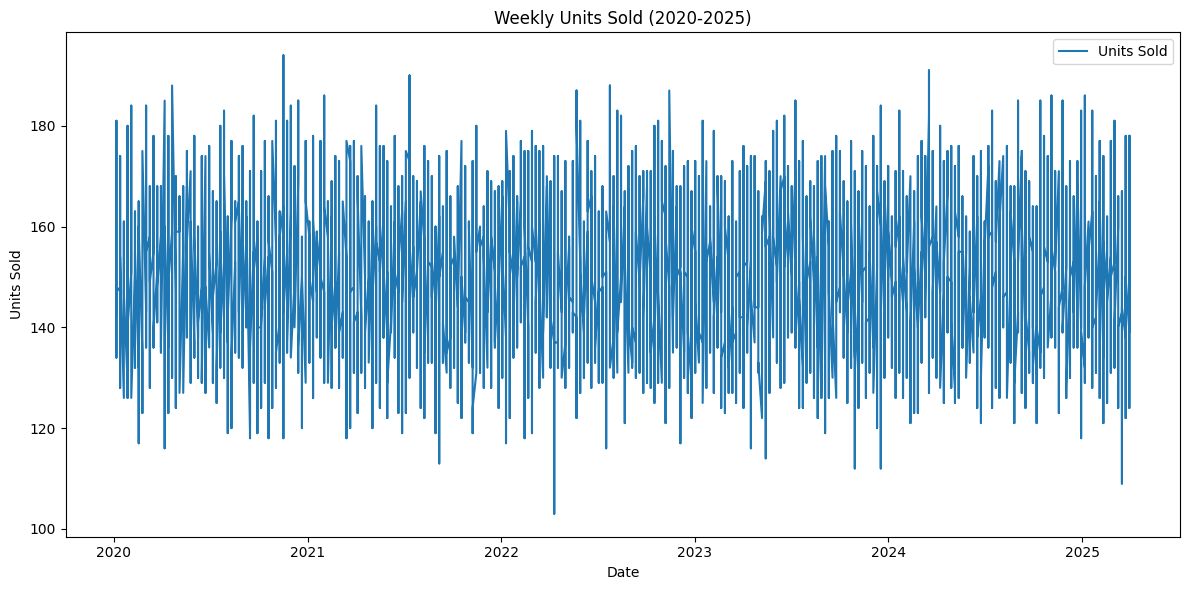

In [ ]:
# time series units sold by week
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset_num['Units Sold'], label='Units Sold')
plt.title('Weekly Units Sold (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()

**Insight**:
- Berdasarkan time series Units Sold mingguan dari tahun 2020 hingga 2025, terlihat bahwa tren penjualan bersifat fluktuatif tanpa pola musiman yang konsisten.
- Hal ini mengindikasikan bahwa permintaan suplemen terjadi secara kontinu sepanjang tahun dan tidak terlalu dipengaruhi oleh musim atau periode tertentu.

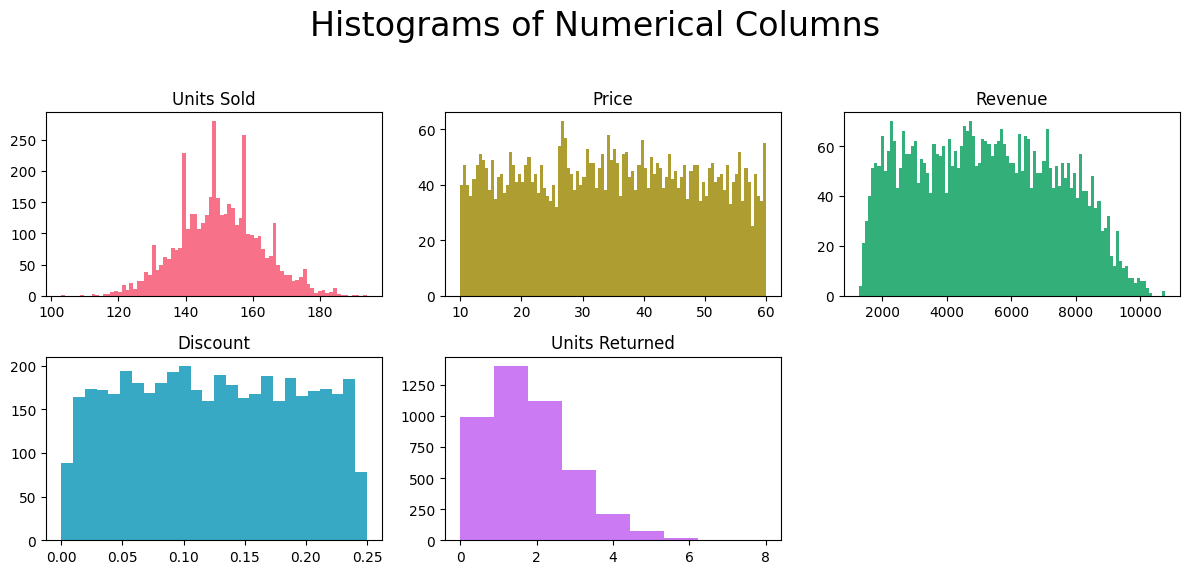

In [ ]:
# Numerik Distribution
dataset2 = dataset.select_dtypes(include='number')

palette = sns.color_palette("husl", len(dataset2.columns))

# Buat histogram
fig = plt.figure(figsize=(12, 6))
plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i, col in enumerate(dataset2.columns):
    plt.subplot((len(dataset2.columns) + 2) // 3, 3, i + 1)  # otomatis atur grid
    plt.title(col)

    unique_vals = np.size(dataset2[col].unique())
    bins = 100 if unique_vals > 100 else unique_vals

    plt.hist(dataset2[col], bins=bins, color=palette[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight**:
- Dari grafik distribusi tersebut secara umum nilai pada Units Sold terdistribusi cukup normal.
- Berbeda pada Price dan Discount yang nilainya distribusi merata.
- Untuk Revenue dan Units Returned memiliki distribusi yang mengarah ke right-skew namun tidak ekstrim.

In [ ]:
def categorical_distribution(dataset, column):
    """
    Plot the distribution of a categorical column in a Pandas DataFrame.

    Args:
        dataset (pd.DataFrame): The Pandas DataFrame.
        column (str): The name of the categorical column to visualize.

    Raises:
        ValueError: If the specified column is not found in the DataFrame.
        TypeError: If the specified column is not categorical or has inappropriate data.
    """
    try:
        # Condition : column not in df
        if column not in dataset.columns:
            raise ValueError(f"Column '{column}' not found in DataFrame.")

        # Condition : trigger when not use object column
        if not dataset[column].dtype.name in ['object', 'category']:
            raise TypeError(f"Column '{column}' must be categorical or a type that can be counted.")

        # Sort value
        order = dataset[column].value_counts().index

        # Plot
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(
            data=dataset,
            x=column,
            hue=column,
            order=order,
            palette='viridis'
        )

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()

        for p in ax.patches:
            ax.annotate(
                f'\n{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,12),
                textcoords='offset points'
            )

        plt.show()

    except Exception as e:
        print(f"Error to show data distribution: {e}")

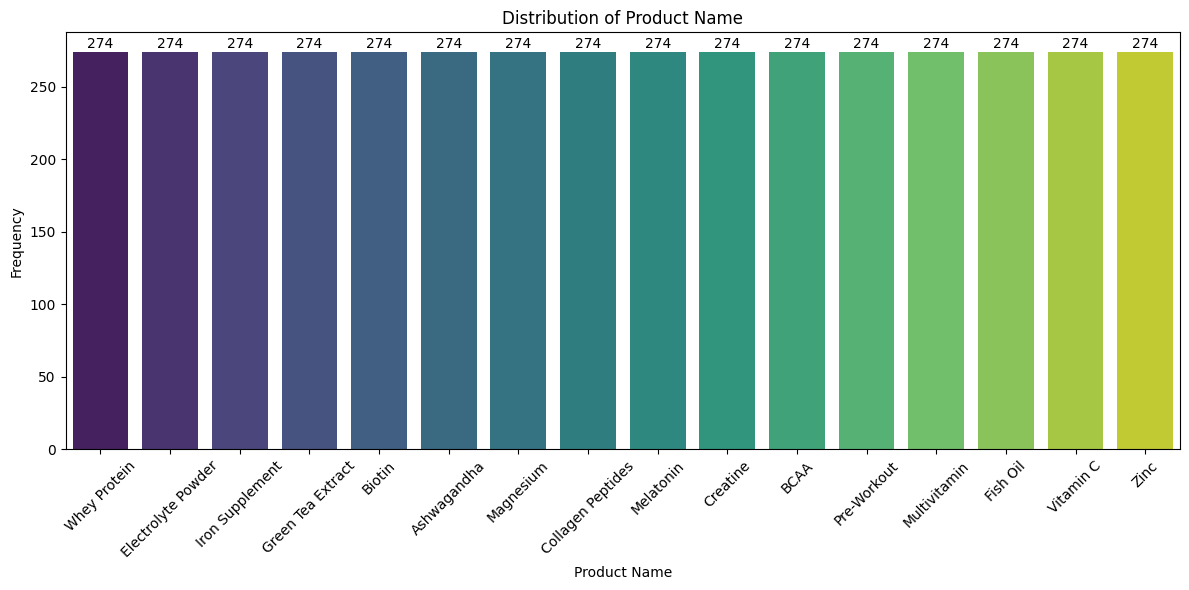

In [ ]:
categorical_distribution(dataset, 'Product Name')

**Insight**:
- Secara keseluruhan setiap produk pada dataset ini memiliki jumlah yang seimbang dari setiap 16 produk yang ada dengan jumlah 274.

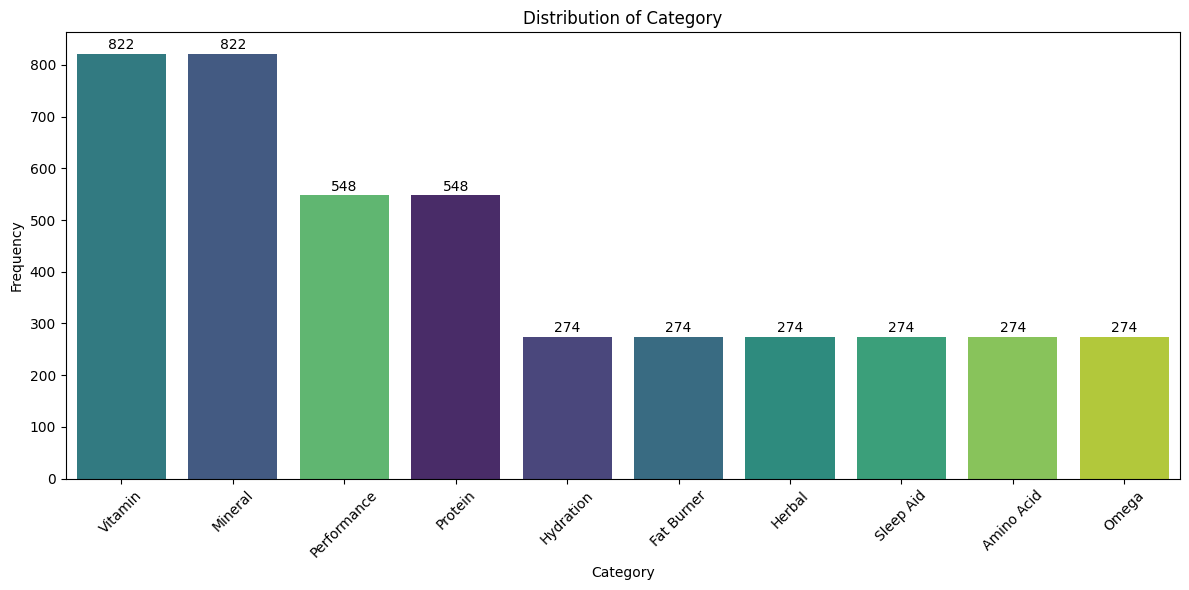

In [ ]:
categorical_distribution(dataset, 'Category')

**Insight**:
- Jika dilihat distribusi berdasarkan kategori produk, Vitamin dan Mineral merupakan produk terbanyak dengan jumlah 822.

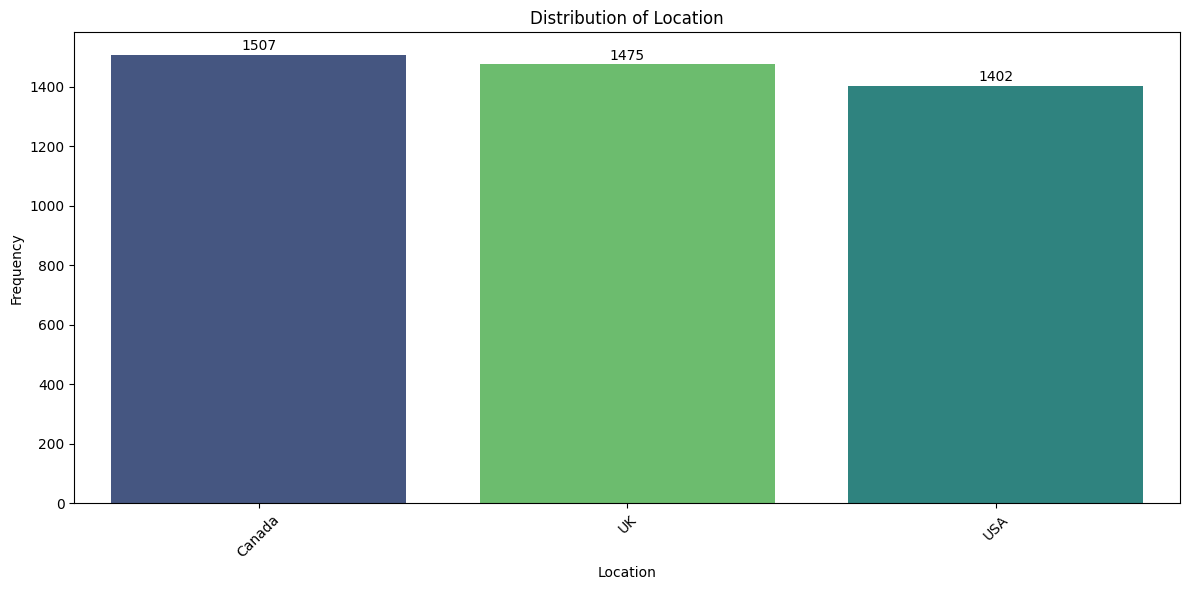

In [ ]:
categorical_distribution(dataset, 'Location')

**Insight**:
- Dari ketiga lokasi yang ada, Canada merupakan negara dengan jumlah record terbanyak dengan 1507 data, kemudian disusul dengan UK dengan 1475 data dan USA dengan 1402 data.

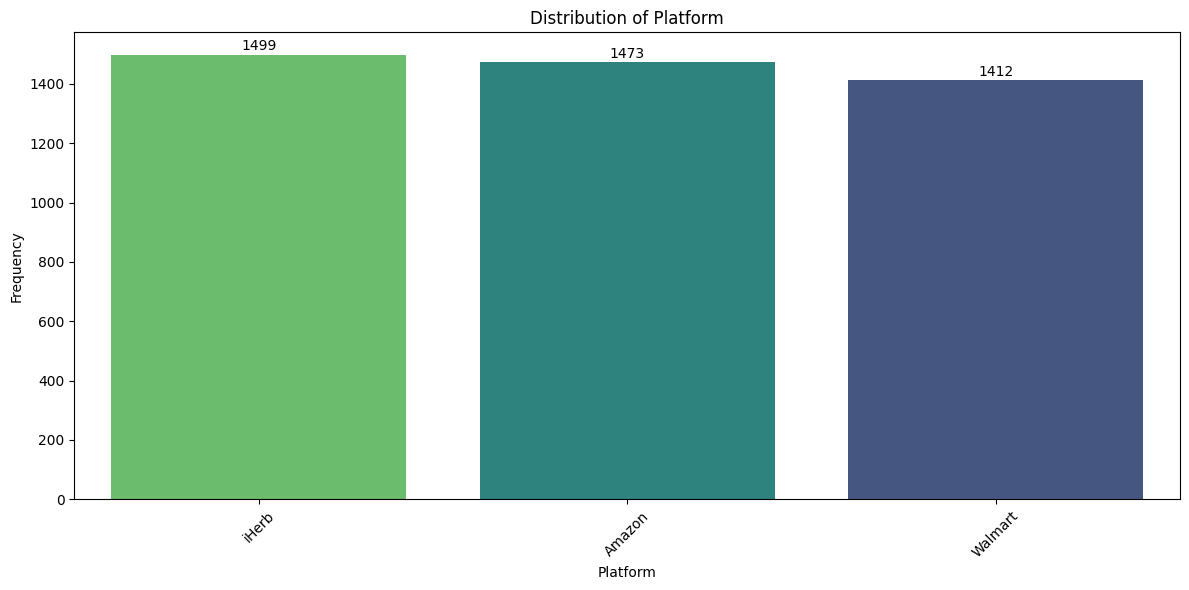

In [ ]:
categorical_distribution(dataset, 'Platform')

**Insight**:
- Dari ketiga platform yang ada, iHerb merupakan platform dengan jumlah record terbanyak dengan 1499 data, kemudian disusul dengan Amazon dengan 1473 data dan Walmart dengan 1412 data.

### **2.7.3 Bivariat Analysis**

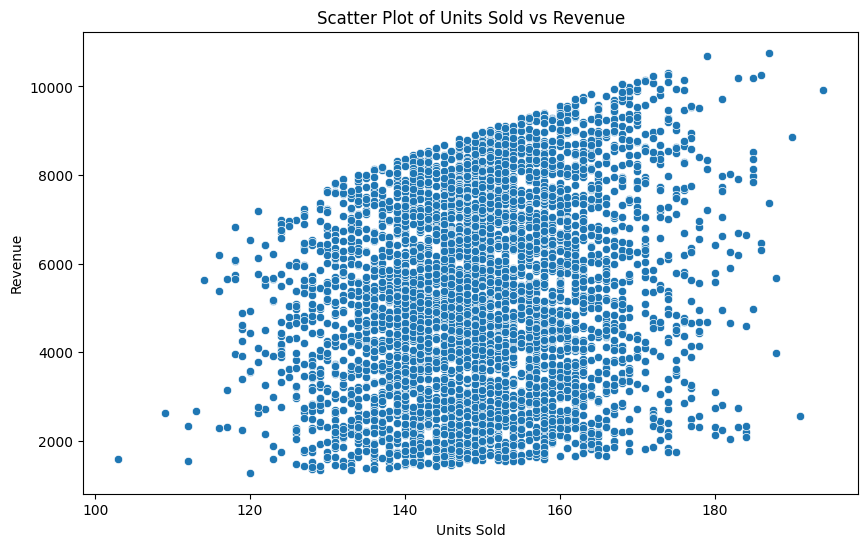

In [ ]:
# Units Sold vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Units Sold', y='Revenue')
plt.title('Scatter Plot of Units Sold vs Revenue')
plt.show()

**Insight**:
- Dari scatterplot Units Sold terhadap Revenue, dapat dilihat bahwa trennya tidak dapat ditentukan dengan pasti, karena hasil ini dipengaruhi oleh faktor lain seperti diskon, produk yang diretur, dll.

In [ ]:
def categorical_bivariat_distribution(df, x_col, hue_col):
    """
    Plot two subplots of the distribution of two categorical columns in a Pandas DataFrame.
    - First plot: Sorted by frequency (auto)
    - Second plot: Uses manual order provided by user

    Args:
        df (pd.DataFrame): The Pandas DataFrame.
        x_col (str): The name of the categorical column for the x-axis.
        hue_col (str): The name of the categorical column for the hue (grouping).

    Raises:
        ValueError: If columns not found or types are wrong.
    """
    try:
        for col in [x_col, hue_col]:
            if col not in dataset.columns:
                raise ValueError(f"Column '{col}' not found in DataFrame.")
            if not dataset[col].dtype.name in ['object', 'category']:
                raise TypeError(f"Column '{col}' must be categorical.")

        plt.figure(figsize=(14, 8))
        order_freq = dataset[x_col].value_counts().index
        ax = sns.countplot(data=dataset, x=x_col, hue=hue_col, order=order_freq)
        plt.title(f'{x_col} vs {hue_col} (Sorted by frequency)')
        plt.xlabel(x_col)
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        for p in ax.patches:
            ax.annotate(
                f'\n{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,12),
                textcoords='offset points'
            )
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in plotting categorical distribution: {e}")

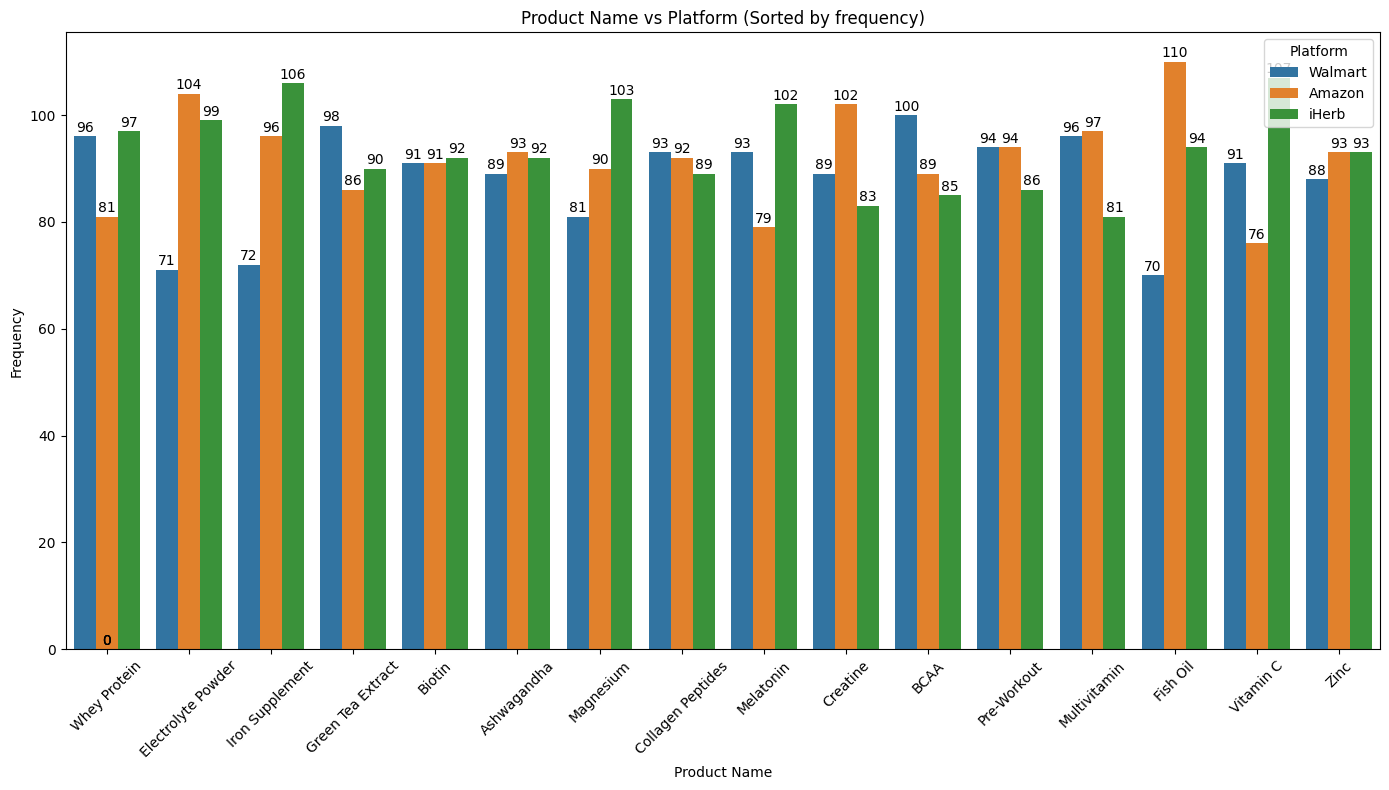

In [ ]:
categorical_bivariat_distribution(df=dataset, x_col='Product Name', hue_col='Platform')

**Insight**:
- Karena sebelumnya dari jumlah produk distribusinya merata, jika produk terhadap platform penjualan produk dapat dilihat bahwa beberapa produk lebih banyak terjual di platform tertentu. Misalnya Whey Protein, Iron Suplement, Biotin, Magnesium dan Melatonin yang banyak terjual di iHerb.

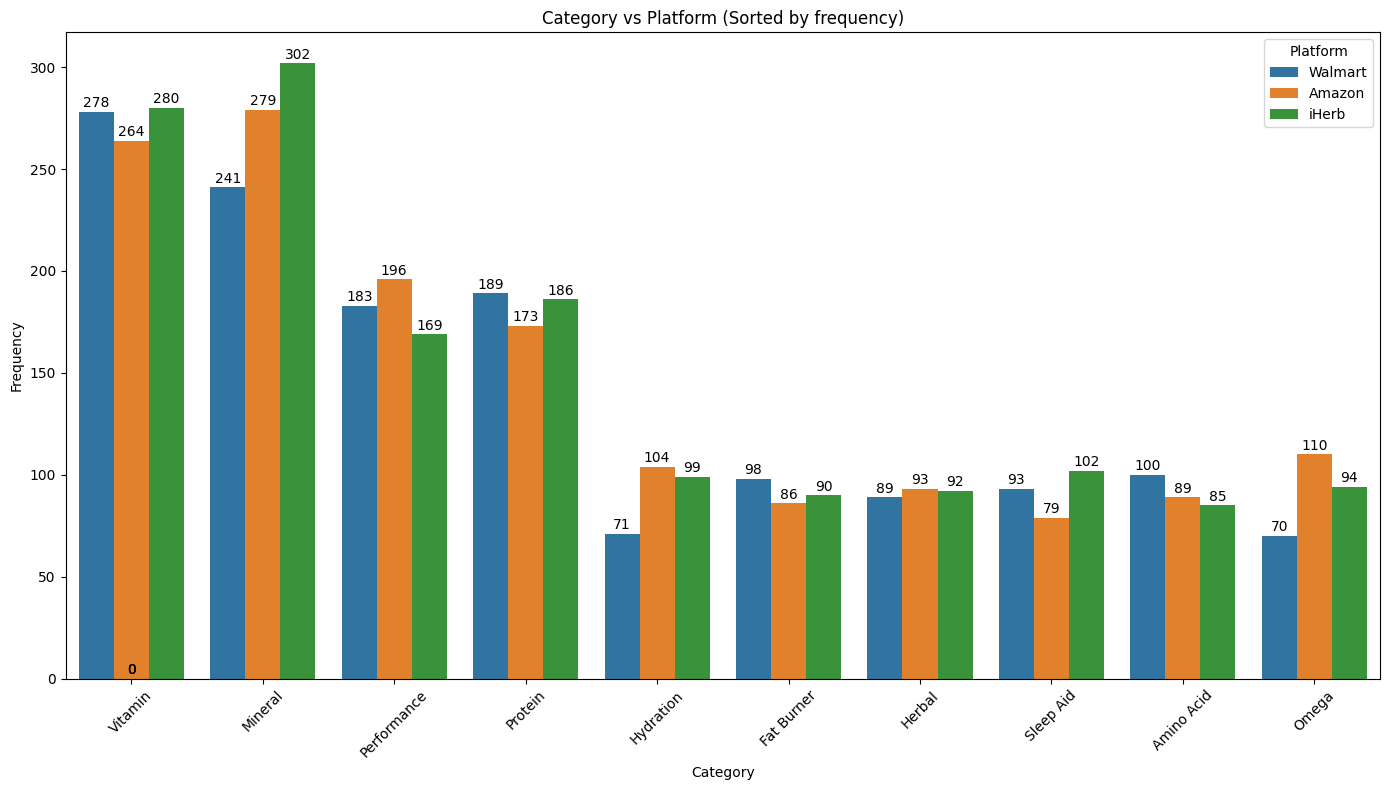

In [ ]:
categorical_bivariat_distribution(df=dataset, x_col='Category', hue_col='Platform')

**Insight**:
- Tren serupa juga antara category terhadap platform dimana kategori tertentu unggul pada platform tertentu juga. Misalnya pada Vitamin, Mineral dan Sleep Aid yang banyak dibeli pada platform iHerb.

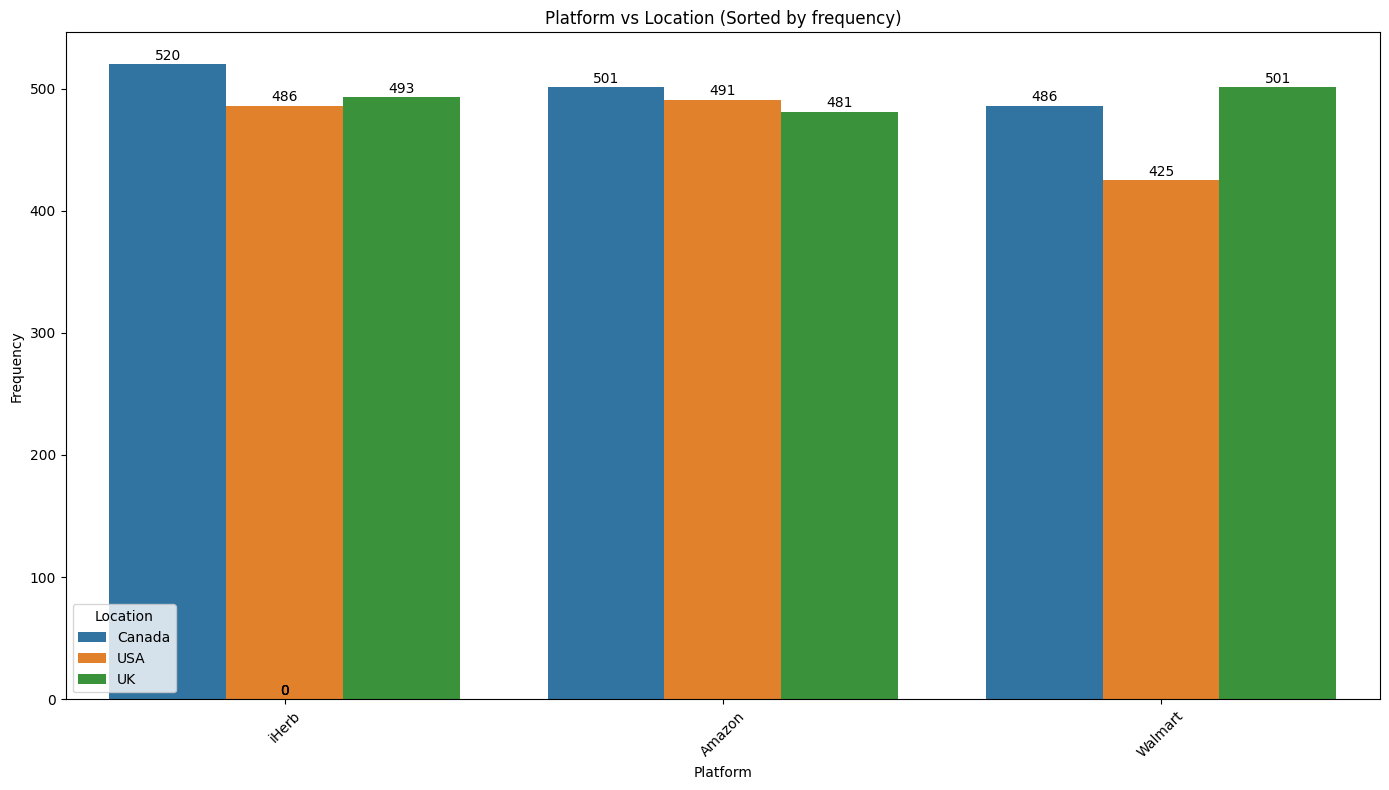

In [ ]:
categorical_bivariat_distribution(df=dataset, x_col='Platform', hue_col='Location')

**Insight**:
- Pada grafik hubungan platform terhadap location menunjukkan bahwa iHerb dan Amazon pasar tertinggi di Canada, meskipun selisihnya tidak signifikan.

### **2.7.4 Multivariat Analysis**

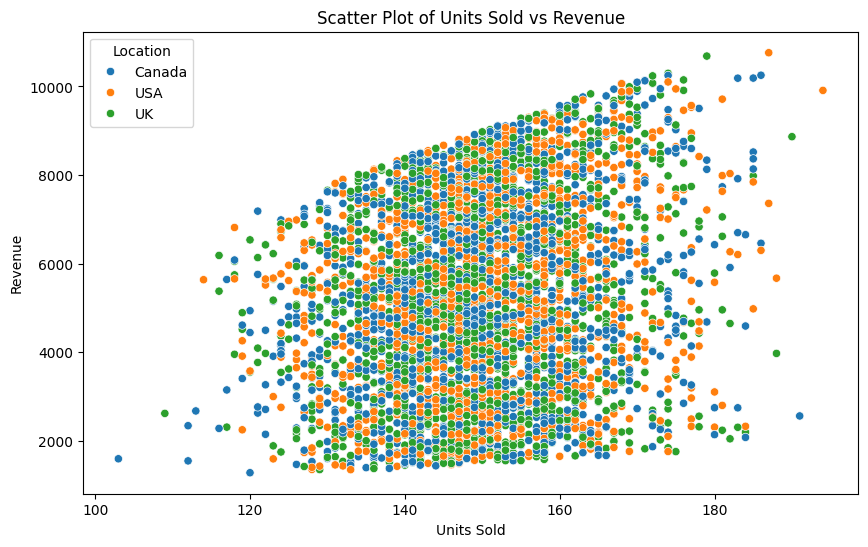

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Units Sold', y='Revenue', hue='Location')
plt.title('Scatter Plot of Units Sold vs Revenue')
plt.show()

**Insight**:
- Dari persebasaran data antara Units Sold dengan Revenue terhadap Location, menunjukkan bahwa pola yang terbentuk tidak menentu. Namun dapat diamati bahwa data bertumpuk pada rentang nilai 125 hingga 165. Sedangkan terdapat beberapa titik data yang di luar dari tren. Asumsi dapat menjadi anomali, namun hasil ini dipengaruhi oleh fitur lain seperti diskon, dll.

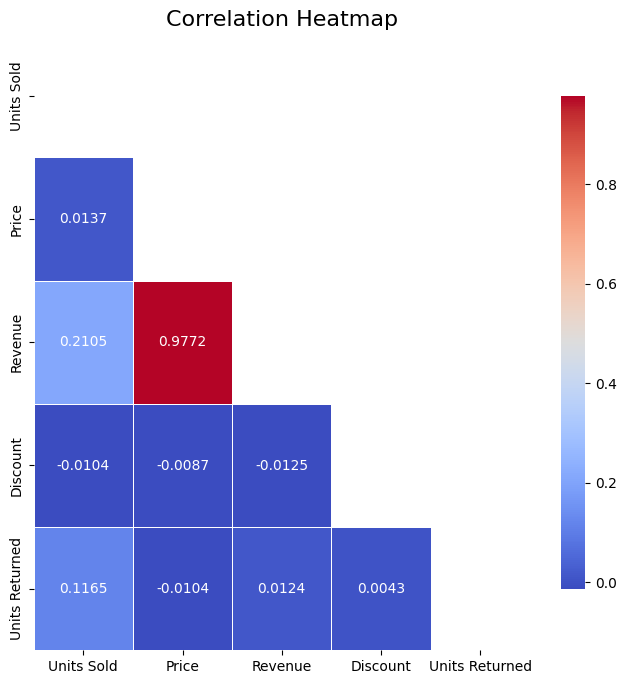

In [ ]:
corr_matrix = dataset_num.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.mask(mask)

# Visualisasikan korelasi dalam bentuk heatmap
plt.figure(figsize=(8,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.4f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Insight**:
- Dari heatmap tersebut menunjukkan bahwa fitur target yakni Units Sold memiliki korelasi yang rendah, baik terhadap Units Returned, Price, Revenue dan Diskon. Namun, fitur-fitur ini tetap digunakan pada proses pelatihan model mengingat fitur yang cukup terbatas.

# **3. Data Preparation**

## **3.1 Label Encoding**

In [ ]:
dataset_pre = dataset.copy()

In [ ]:
# Encode categorical variables
le_product = LabelEncoder()
le_category = LabelEncoder()
le_location = LabelEncoder()
le_platform = LabelEncoder()

dataset_pre['Product Name'] = le_product.fit_transform(dataset_pre['Product Name'])
dataset_pre['Category'] = le_category.fit_transform(dataset_pre['Category'])
dataset_pre['Location'] = le_location.fit_transform(dataset_pre['Location'])
dataset_pre['Platform'] = le_platform.fit_transform(dataset_pre['Platform'])

In [ ]:
dataset_pre.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,14,7,143,31.98,4573.14,0.03,2,0,1
15,2020-01-06,5,3,154,35.92,5531.68,0.04,2,2,0
14,2020-01-06,8,4,149,42.97,6402.53,0.22,2,0,2
13,2020-01-06,7,1,143,31.88,4558.84,0.06,3,1,1
12,2020-01-06,2,9,159,28.79,4577.61,0.10,1,1,2


**Insight**:
- Pada dataset dengan fitur kategorikal, dilakukan proses Label Encoding untuk mengubah data kategorikal menjadi format numerik agar dapat digunakan dalam proses pelatihan model machine learning. Proses ini penting terutama untuk algoritma yang tidak dapat bekerja langsung dengan data dalam bentuk string.

## **3.2 Feature Extraction**

In [ ]:
dataset_pre['year'] = dataset_pre['Date'].dt.year
dataset_pre['month'] = dataset_pre['Date'].dt.month
dataset_pre['Week'] = dataset_pre['Date'].dt.isocalendar().week

**Insight**:
- Fitur ektraksi dilakukan pada kolom Date yang terbagi menjadi tahun, bulan dan minggu untuk membantu dalam analisis musiman dan memudahkan model untuk mempelajari pola berdasarkan waktu.
- Tujuan dari proses ini adalah untuk menyediakan informasi waktu dalam bentuk numerik, sehingga:

   1. Dapat membantu analisis musiman seperti tren penjualan per bulan atau minggu,

   2. Memudahkan model dalam mempelajari pola temporal, misalnya apakah penjualan cenderung naik saat akhir tahun atau turun di awal tahun.

## **3.3 Feature Engineering**

In [ ]:
# Create lag features for Units Sold (1, 2, 4 weeks)
dataset_pre = dataset_pre.sort_values(['Product Name', 'Date'])
dataset_pre['Lag 1'] = dataset_pre.groupby('Product Name')['Units Sold'].shift(1)
dataset_pre['Lag 2'] = dataset_pre.groupby('Product Name')['Units Sold'].shift(2)
dataset_pre['Lag 4'] = dataset_pre.groupby('Product Name')['Units Sold'].shift(4)

# price after disc feature
dataset_pre['Price Discount'] =dataset_pre['Price'] * dataset_pre['Discount']

In [ ]:
# Create rolling statistics (4-week window)
dataset_pre['Rolling Mean 4'] = dataset_pre.groupby('Product Name')['Units Sold'].shift(1).rolling(window=4).mean()
dataset_pre['Rolling Std 4'] = dataset_pre.groupby('Product Name')['Units Sold'].shift(1).rolling(window=4).std()

dataset_pre = dataset_pre.dropna()

In [ ]:
dataset_pre.shape

(4320, 19)

In [ ]:
dataset_pre.columns.to_list()

['Date',
 'Product Name',
 'Category',
 'Units Sold',
 'Price',
 'Revenue',
 'Discount',
 'Units Returned',
 'Location',
 'Platform',
 'year',
 'month',
 'Week',
 'Lag 1',
 'Lag 2',
 'Lag 4',
 'Price Discount',
 'Rolling Mean 4',
 'Rolling Std 4']

**Insight**:
- Lag features (Lag 1, Lag 2, Lag 4): Mengambil nilai Units Sold dari 1, 2, dan 4 periode sebelumnya untuk masing-masing Product Name, yang dapat membantu model mempelajari pola time series atau tren penjualan historis.

- Price Discount: Fitur baru yang merepresentasikan besaran diskon aktual (Price × Discount) sehingga bisa menganalisis pengaruh diskon terhadap penjualan.

- Rolling Mean dan Std (4 periode): Menghitung rata-rata bergerak (Rolling Mean) dan standar deviasi bergerak (Rolling Std) dari Units Sold selama 4 periode sebelumnya, yang memberikan informasi kontekstual mengenai fluktuasi dan stabilitas penjualan tiap produk dari waktu ke waktu.

- Setelah proses feature extraction dan feature engineering dataset menjadi 19 kolom.

- Seluruh proses ini dilakukan dengan tujuan untuk memastikan model memiliki cukup informasi historis, statistik, dan kontekstual dalam mempelajari data penjualan agar model memiliki fitur yang cukup dan dapat melakukan prediksi yang akurat.


## **3.4 Split Dataset for Train & Test**

In [ ]:
dataset_clean = dataset_pre.copy()

In [ ]:
train_data = dataset_clean[dataset_clean['year'] <= 2023]
test_data = dataset_clean[dataset_clean['year'] >= 2024]

In [ ]:
# Define features and target
features = ['year',
            'month',
            'Week',
            'Product Name',
            'Category',
            'Price',
            'Discount',
            'Price Discount',
            'Units Returned',
            'Location',
            'Platform',
            'Lag 1',
            'Lag 2',
            'Lag 4',
            'Rolling Mean 4',
            'Rolling Std 4'
]
target = 'Units Sold'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [ ]:
X_train.head()

,year,month,Week,Product Name,Category,Price,Discount,Price Discount,Units Returned,Location,Platform,Lag 1,Lag 2,Lag 4,Rolling Mean 4,Rolling Std 4
74,2020,2,6,0,2,19.21,0.22,4.2262,2,1,0,174.0,156.0,181.0,161.00,21.432063
90,2020,2,7,0,2,33.02,0.22,7.2644,1,2,2,135.0,174.0,133.0,149.50,19.364917
106,2020,2,8,0,2,33.62,0.01,0.3362,0,2,2,132.0,135.0,156.0,149.25,19.653244
122,2020,2,9,0,2,27.16,0.18,4.8888,2,1,2,141.0,132.0,174.0,145.50,19.364917
138,2020,3,10,0,2,39.02,0.03,1.1706,1,2,0,133.0,141.0,135.0,135.25,4.031129


**Insight**:
- Untuk pemodelan forcasting, sangat penting untuk tidak mencampur data masa depan dalam pelatihan model. Data train yang digunakan yakni dengan rentang histori tahun <= 2023, sedangkan untuk data test menggunakan histori tahun >= 2024, dimana Units Sold sebagai variabel target.

- Dengan pemisahan berbasis waktu ini, model diharapkan dapat menghasilkan prediksi yang lebih general dan dapat diandalkan dalam menghadapi data penjualan di masa depan.

# **4. Modeling**

XGBoost (Extreme Gradient Boosting) adalah algoritma machine learning berbasis decision tree yang menggunakan teknik gradient boosting untuk meningkatkan akurasi model. XGBoost dirancang agar cepat, efisien, dan banyak digunakan dalam kompetisi serta industri. Dimana cara kerjanya sebagai berikut.

- Memulai dari model sederhana.
- Mengukur kesalahan (loss).
- Membuat model baru untuk memperbaiki kesalahan sebelumnya.
- Menggabungkan semua model menjadi prediksi akhir.
- Proses diulang sampai error minimal atau mencapai batas iterasi.

---

## Kelebihan XGBoost

- **Performa tinggi:** Cepat dan akurat, sangat cocok untuk data tabular.
- **Regularisasi built-in:** Mencegah overfitting dengan L1 dan L2 regularization.
- **Menangani missing value:** Otomatis mengelola data yang hilang.
- **Support untuk berbagai tipe masalah:** Bisa digunakan untuk klasifikasi, regresi, dan ranking.
- **Parallel processing:** Memanfaatkan CPU multi-core untuk pelatihan lebih cepat.
- **Feature importance:** Memberikan informasi fitur yang paling berpengaruh.
- **Banyak opsi tuning:** Hyperparameter yang fleksibel untuk optimasi performa.

---

## Kekurangan XGBoost

- **Kompleksitas tinggi:** Banyak parameter yang harus dipahami dan diatur dengan baik.
- **Training time bisa lama:** Terutama pada dataset besar dengan fitur banyak.
- **Kurang cocok untuk data sekuensial:** Perlu preprocessing tambahan untuk data teks, gambar, atau time-series.
- **Interpretabilitas terbatas:** Sulit dijelaskan dibanding model linear sederhana.

---

## **4.1 Base Model: XGBoost**

In [ ]:
# build model to train
models = []

# XGBoost
models.append(
    (
        'XGBoost',
        XGBRegressor()
    )
)

**Insight**:
- Untuk tahap awal, dilakukan pelatihan model menggunakan algoritma XGBoost Regressor tanpa penyetelan parameter (default hyperparameters).
- Model ini digunakan sebagai baseline untuk membandingkan performa dengan model yang dituning.

## **4.2 Tuned Model: XGBoost + GridSearchCV**

In [ ]:
# Initialize the XGBoost Regressor
xgbr = XGBRegressor(random_state=42)

# Define hyperparameters
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}

# perform GridSearchCV with 5-fold cross-validation
xgbr_cv = GridSearchCV(xgbr, params, cv=5, scoring='r2', n_jobs=-1)
xgbr_cv.fit(X_train, y_train)

# Make predictions on training and test sets
y_xgbr_pred_train = xgbr_cv.predict(X_train)
y_xgbr_pred_test = xgbr_cv.predict(X_test)

# best parameters
print("Best parameters:", xgbr_cv.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


**Insight**:
- Setelah baseline model, dilakukan proses penyetelan (tuning) menggunakan GridSearchCV dengan 5-fold cross-validation.
- Parameter yang dituning meliputi:
  1. max_depth: [3, 5, 7] → mengontrol kompleksitas pohon.
  2. learning_rate: [0.01, 0.1, 0.2] → menentukan seberapa besar kontribusi setiap pohon.
  3. n_estimators: [100, 200, 300] → jumlah pohon yang digunakan.

- Model XGBoost yang dilatih memiliki parameter terbaik dengan learning rate 0.01, max depth 3 dan n estimators 100.

# **5. Evaluation**

Dalam proyek ini, digunakan **dua metrik evaluasi utama** untuk mengukur kinerja model regresi dalam memprediksi *units sold* Suplement Sales:

### 1. RMSE (Root Mean Squared Error)
- **Formula**:
  $$
  RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
  $$
- **Penjelasan**:  
  RMSE mengukur seberapa jauh rata-rata prediksi model dari nilai aktual dalam **satuan asli** (misalnya, unit penjualan). Nilai RMSE yang **lebih kecil** menunjukkan performa model yang lebih baik. RMSE **sensitif terhadap outlier** karena menggunakan kuadrat dari selisih prediksi dan nilai aktual.

---

### 2. MAPE (Mean Absolute Percentage Error)
- **Formula**:
  $$
  MAPE = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
  $$
- **Penjelasan**:  
  MAPE menunjukkan rata-rata kesalahan prediksi dalam bentuk **persentase terhadap nilai aktual**.  
  Metrik ini **mudah dipahami oleh bisnis** karena disajikan dalam bentuk persentase.  
  Nilai MAPE yang **lebih kecil** menunjukkan prediksi yang lebih akurat.  
  Namun, MAPE bisa **bermasalah jika terdapat nilai aktual mendekati nol**.

## **5.1 Base Model: XGBoost**

In [ ]:
rmse_result_train = []
mape_result_train = []
rmse_result_test = []
mape_result_test = []

col = ['Algorithm', 'Train RMSE', 'Train MAPE', 'Test RMSE', 'Test MAPE']
model_results = pd.DataFrame(columns=col)

i = 0
for name, model in models:
    model.fit(X_train, y_train)

    # Prediksi data train dan test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Hitung metrik train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

    # Hitung metrik test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    # Simpan hasil
    rmse_result_train.append(rmse_train)
    mape_result_train.append(mape_train)
    rmse_result_test.append(rmse_test)
    mape_result_test.append(mape_test)

    model_results.loc[i] = [name, rmse_train, mape_train, rmse_test, mape_test]
    i += 1

# Tampilkan hasil
model_results

,Algorithm,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,XGBoost,3.699408,0.018083,13.659235,0.071931


## **5.2 Tuned Model: XGBoost + GridSearchCV**

In [ ]:
# Evaluate model performance
xgbr_rmse_train = np.sqrt(mean_squared_error(y_train, y_xgbr_pred_train))
xgbr_mape_train = mean_absolute_percentage_error(y_train, y_xgbr_pred_train)

xgbr_rmse_test = np.sqrt(mean_squared_error(y_test, y_xgbr_pred_test))
xgbr_mape_test = mean_absolute_percentage_error(y_test, y_xgbr_pred_test)

results_dict = {
    'Algorithm': ['Tuned XGBoost'],
    'Train RMSE': [xgbr_rmse_train],
    'Train MAPE': [xgbr_mape_train],
    'Test RMSE': [xgbr_rmse_test],
    'Test MAPE': [xgbr_mape_test]
}

# Buat DataFrame
model_results_df = pd.DataFrame(results_dict)

# Tampilkan DataFrame
model_results_df

,Algorithm,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,Tuned XGBoost,12.213225,0.065535,12.254086,0.064967


**Insight**:
- Baseline XGBoost memiliki train RMSE dan MAPE yang sangat rendah, menunjukkan kemungkinan overfitting: model sangat bagus pada data pelatihan namun performa menurun pada data uji (test RMSE jauh lebih tinggi dari train RMSE).

- Tuned XGBoost menggunakan GridSearchCV:

    1. Memiliki train RMSE dan MAPE yang lebih tinggi dari baseline → artinya model menjadi lebih general (tidak overfit).

    2. Test RMSE dan Test MAPE lebih rendah dari baseline, menunjukkan bahwa model ini lebih stabil dan lebih baik dalam generalisasi ke data baru.

- Sehingga model Tuned XGBoost dapat digunakan untuk memprediksi *Units Sold* dan membantu dalam pengambilan keputusan stok suplemen. Berdasarkan hasil evaluasi, model ini memiliki rata-rata kesalahan prediksi sebesar **12,21 unit (RMSE)** dan kesalahan relatif rata-rata sebesar **6,5% (MAPE)**. Artinya, secara umum, model dapat memprediksi jumlah penjualan dengan deviasi sekitar 12 unit dari nilai aktual. Sebagai contoh, jika jumlah penjualan aktual adalah **150 unit**, maka prediksi model kemungkinan berada di sekitar angka **138 hingga 162 unit**. Namun, ini hanyalah gambaran umum karena **RMSE bukan batas pasti**, melainkan rata-rata dari semua kesalahan prediksi.


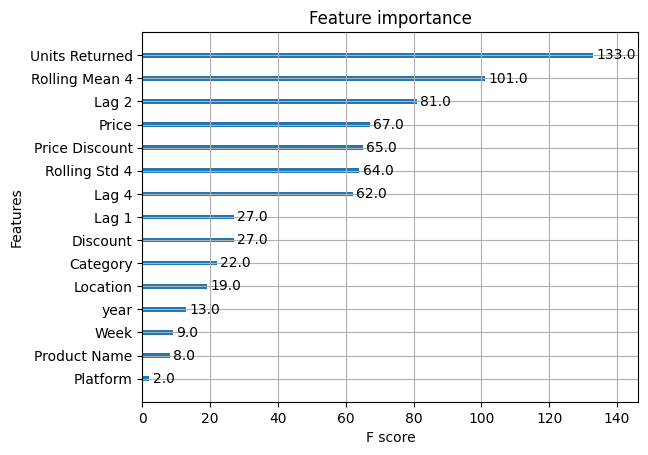

In [ ]:
# Feature importance
plot_importance(xgbr_cv.best_estimator_)
plt.show()

**Insight**:
- Dari grafik tersebut menunjukkan fitur yang paling berpengaruh dalam proses latih model. Dimana Units Returned, Rolling Mean 4 dan Lag 2 menjadi 3 fitur dengan kontribusi tertinggi.

In [ ]:
# Output predictions for analysis
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_xgbr_pred_test
})
print("\nSample Predictions (First 10 Rows):")
print(results.head(10))


Sample Predictions (First 10 Rows):
      Actual   Predicted
3338     172  152.888855
3354     137  150.600769
3370     146  149.770157
3386     154  150.654465
3402     153  150.495361
3418     152  149.225464
3434     140  149.824783
3450     160  149.770157
3466     140  151.114182
3482     145  149.770157


**Insight**:
- Hasil di atas merupakan perbandingan prediksi dan aktual dari dataset dengan model yang latih sebelumnya.

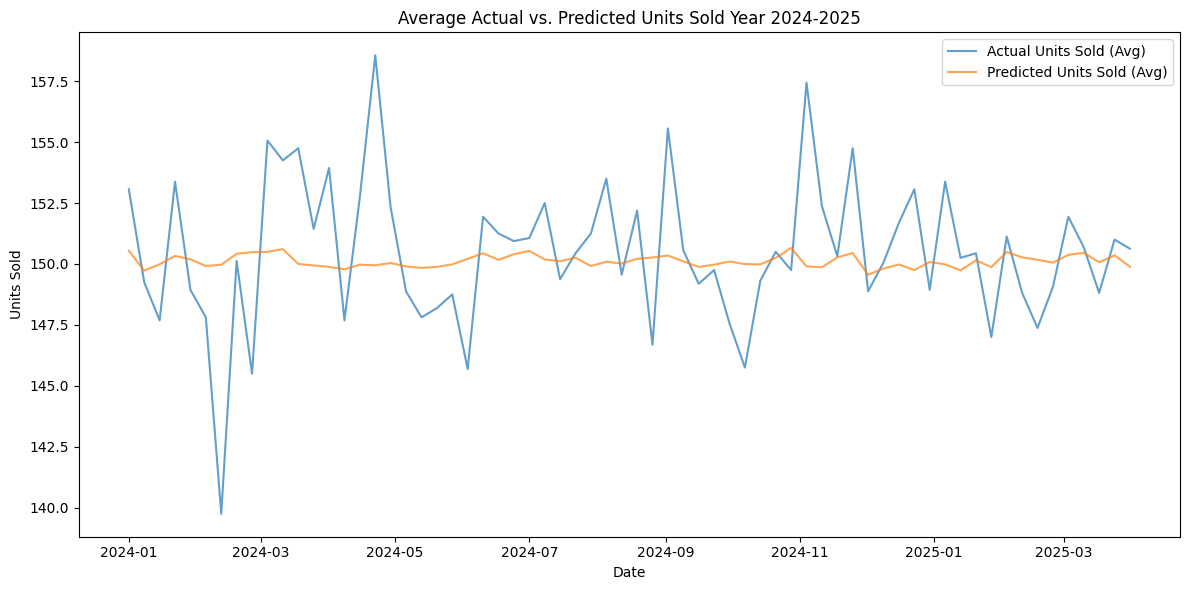

In [ ]:
test_results = test_data.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_xgbr_pred_test

# Plot actual vs. predicted values
agg_results = test_results.groupby('Date')[['Actual', 'Predicted']].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(agg_results['Date'], agg_results['Actual'], label='Actual Units Sold (Avg)', alpha=0.7)
plt.plot(agg_results['Date'], agg_results['Predicted'], label='Predicted Units Sold (Avg)', alpha=0.7)
plt.title('Average Actual vs. Predicted Units Sold Year 2024-2025')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()

**Insight**:
- Dari grafik timeseries rerata aktual dengan hasil prediksi menunjukkan bahwa tren yang cukup berbeda. Dimana untuk data aktual grafik memiliki tren fluktuatif, berbeda dengan hasil prediksi yang cenderung stabil. Hasil ini menunjukkan model memberikan prediksi yang konservatif sehingga dalam implementasinya dapat mengantisipasi lonjakan permintaan dan menghindari kelebihan stok.